### Random Forest

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
%matplotlib inline

In [10]:
df = pd.read_csv('../data/Iris.csv')
df = df.rename(index=str, columns={"Species": "Class"})

In [11]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df['Class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Class            150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 8.2+ KB


In [25]:
features_ = df.drop(['SepalWidthCm','PetalWidthCm','Class','Id'],axis=1).values
class_ = df['Class'].values

from sklearn.preprocessing import LabelEncoder
labelencoder_forecast = LabelEncoder()
class_ = labelencoder_forecast.fit_transform(class_)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_, class_, test_size=0.3, random_state=1) 

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics 

classifier_rf = RandomForestClassifier(random_state=1, n_estimators=100, max_depth=5)
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

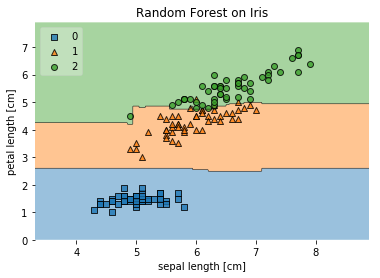

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(features_, class_, clf=classifier_rf, legend=2)

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Random Forest on Iris')

plt.show()

#### avaliando o algoritmo com validação cruzada

In [32]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_rf, features_, class_, scoring='accuracy', cv=10)
print(scores_dt.mean())

0.9466666666666667


In [33]:
y_pred = classifier_rf.predict(X_test)

In [34]:
print(classification_report(y_test,y_pred))
print("Random Forest model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.94      0.97        18
           2       0.93      1.00      0.96        13

   micro avg       0.98      0.98      0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Random Forest model accuracy(in %): 97.77777777777777
[[14  0  0]
 [ 0 17  1]
 [ 0  0 13]]


In [36]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            "criterion": ['entropy', 'gini'],
            "n_estimators": [25, 50, 75],
            "bootstrap": [False, True],
            "max_depth": [3, 5, 10],
            "max_features": ['auto', 0.1, 0.2, 0.3]
}
grid_search = GridSearchCV(classifier_rf, param_grid, scoring="accuracy")
grid_search.fit(features_, class_)

classifier_rf = grid_search.best_estimator_  # Pegando o melhor classificador

print(grid_search.best_score_)
print(grid_search.best_params_)

0.9533333333333334
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 50}


C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
